In [308]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import scipy
import random
import sklearn

In [67]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")

print(trainData.shape,testData.shape)

targetArr = trainData["Transported"]
del  trainData["PassengerId"], testData["PassengerId"],trainData["Name"],testData["Name"]
print(trainData.shape,testData.shape)

(8693, 14) (4277, 13)
(8693, 12) (4277, 11)


In [68]:
trainData.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [69]:
"""
Unnecessary columns are deleted.
"""

'\nUnnecessary columns are deleted.\n'

[4, 3, 6561, 4, 81, 3, 1274, 1508, 1116, 1328, 1307, 2]


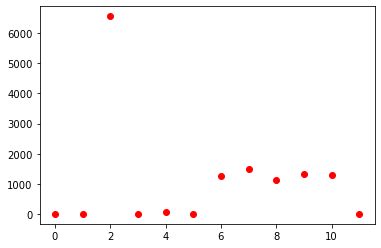

In [70]:
uniqueLen = []
for i in range(trainData.shape[1]):
    uniqueLen.append(trainData.iloc[:,i].unique().shape[0])
print(uniqueLen)
plt.plot(uniqueLen,"ro")
plt.show()

In [71]:
trainData.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

In [72]:
"""

Column 2 : There is a total of ~8700. 6000+ unique values are meaningless. Drop the 2nd column too.

Column 4,6,7,8,9,10 are continuous values.

"""

'\n\nColumn 2 : There is a total of ~8700. 6000+ unique values are meaningless. Drop the 2nd column too.\n\nColumn 4,6,7,8,9,10 are continuous values.\n\n'

In [73]:
del trainData["Cabin"],testData["Cabin"]

In [74]:
trainData.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


(1925,)


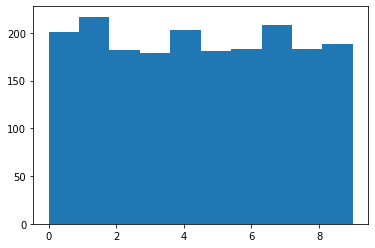

In [75]:
"""
Total Nulls
"""
print(np.where(trainData.isnull() ==  True)[0].shape)
colNullNums = np.where(trainData.isnull() ==  True)[1]
"""
Nulls column distribution
"""
plt.hist(colNullNums)
plt.show()

In [76]:
"""
nTrainData doesnt contain any null values
"""
nTrainData = trainData.copy()
nTrainData = trainData.drop(np.where(trainData.isnull() ==  True)[0])
print(nTrainData.shape)

(6923, 11)


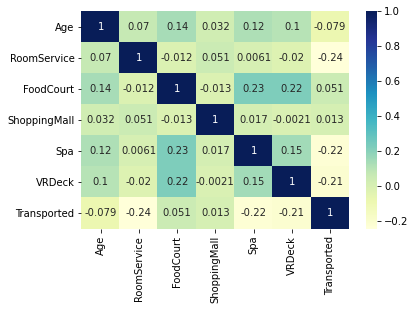

In [83]:
corrMatrix = nTrainData.corr()
dataplot = sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)

In [ ]:
"""
No strong correlation
"""

In [263]:
uniqueLen = []
for i in range(nTrainData.shape[1]):
    if nTrainData.iloc[:,i].dtype == object:
        uniqueLen.append(nTrainData.iloc[:,i].unique())
print(uniqueLen)

[array(['Europa', 'Earth', 'Mars'], dtype=object), array([False, True], dtype=object), array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e'], dtype=object), array([False, True], dtype=object)]


In [341]:
copp = nTrainData.copy()
for i in range(len(uniqueLen)):
    copp = copp.replace(uniqueLen[i],range(0,len(uniqueLen[i]),1),inplace = False)

In [342]:
copp = copp.reset_index()
del copp["index"]

In [343]:
copp.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0,0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,1,0,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0,0,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0,0,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,1,0,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


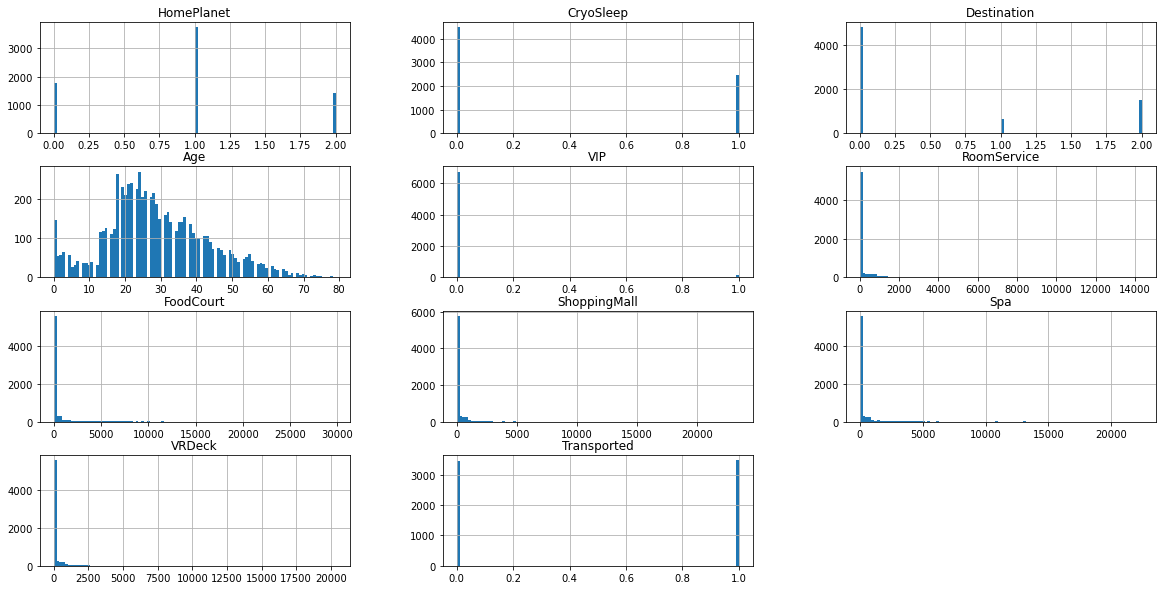

In [344]:
deneme = copp.hist(bins = 100,figsize=(20,10))

In [345]:
"""
Age : Continuous --> There are 0s..
Vip : Binary -- Imbalanced
RoomService :Continuous - Too much noise
FoodCourt: Continuous -- too much noise
ShoppingMail: Continuous -- too much noise
RoomService: Continuous -- too much noise
VrDeck: Continuous -- too much noise
"""

'\nAge : Continuous --> There are 0s..\nVip : Binary -- Imbalanced\nRoomService :Continuous - Too much noise\nFoodCourt: Continuous -- too much noise\nShoppingMail: Continuous -- too much noise\nRoomService: Continuous -- too much noise\nVrDeck: Continuous -- too much noise\n'

In [346]:
copp.drop(np.where(copp["RoomService"]>1000)[0],inplace=True,axis=0)
copp = copp.reset_index()
del copp["index"]
copp.drop(np.where(copp["FoodCourt"]>1000)[0],inplace=True,axis=0)
copp = copp.reset_index()
del copp["index"]
copp.drop(np.where(copp["ShoppingMall"]>1000)[0],inplace=True,axis=0)
copp = copp.reset_index()
del copp["index"]
copp.drop(np.where(copp["Spa"]>1000)[0],inplace=True,axis=0)
copp = copp.reset_index()
del copp["index"]
copp.drop(np.where(copp["VRDeck"]>1000)[0],inplace=True,axis=0)
copp = copp.reset_index()
del copp["index"]

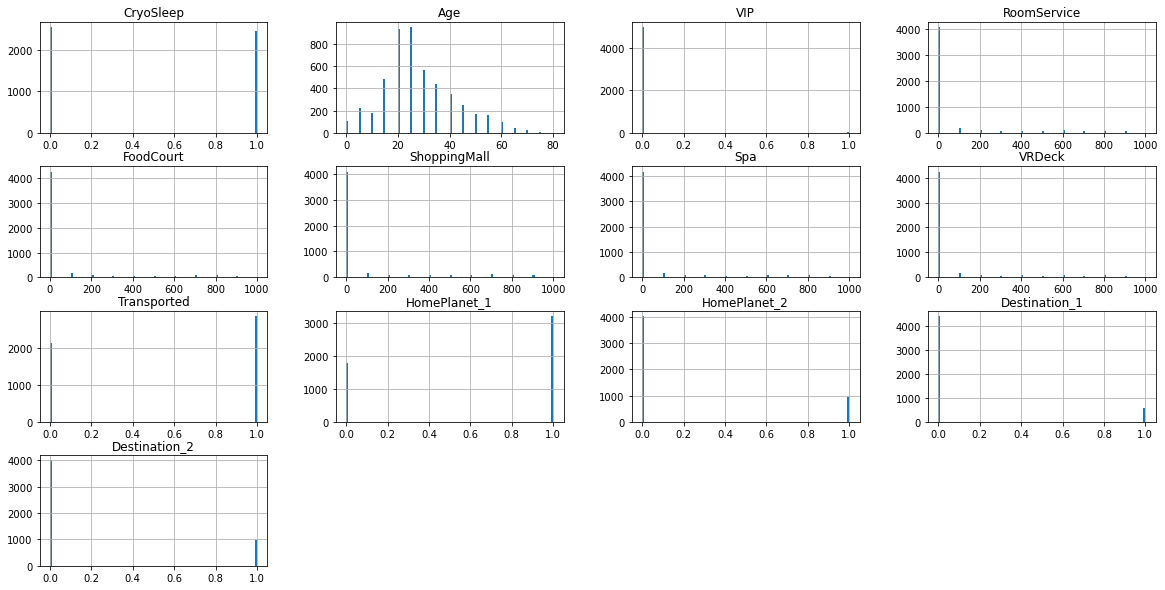

In [383]:
deneme = copp.hist(bins = 100,figsize=(20,10))

In [348]:
dummies = pd.get_dummies(copp,columns = ["HomePlanet","Destination"],drop_first=True)

In [349]:
copp = dummies

In [350]:
copp.dtypes

CryoSleep          int64
Age              float64
VIP                int64
RoomService      float64
FoodCourt        float64
ShoppingMall     float64
Spa              float64
VRDeck           float64
Transported        int64
HomePlanet_1       uint8
HomePlanet_2       uint8
Destination_1      uint8
Destination_2      uint8
dtype: object

In [351]:
copp["Age"].replace(0,copp["Age"].median(),inplace=True)

In [352]:
copp["Age"]=round(copp["Age"]/5)*5

In [365]:
copp["RoomService"]=round(copp["RoomService"]/100)*100
copp["FoodCourt"]=round(copp["FoodCourt"]/100)*100
copp["ShoppingMall"]=round(copp["ShoppingMall"]/100)*100
copp["Spa"]=round(copp["Spa"]/100)*100
copp["VRDeck"]=round(copp["VRDeck"]/100)*100

In [366]:
targetsNp = copp["Transported"].to_numpy()
trainsNp = copp.drop(["Transported"],axis = 1,inplace = False).to_numpy()

In [379]:
splitRatio = 0.9
xTrain = trainsNp[:int(trainsNp.shape[0]*splitRatio)]
yTrain = targetsNp[:int(targetsNp.shape[0]*splitRatio)]

xTest = trainsNp[int(trainsNp.shape[0]*splitRatio):]
yTest = targetsNp[int(targetsNp.shape[0]*splitRatio):]

In [380]:
from sklearn.naive_bayes import MultinomialNB

In [381]:
classModel = MultinomialNB()
classModel.fit(xTrain,yTrain)

MultinomialNB()

In [382]:
classModel.score(xTest,yTest)

0.7454909819639278

In [386]:
copp.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_1,HomePlanet_2,Destination_1,Destination_2
0,0,40.0,0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,0,25.0,0,100.0,0.0,0.0,500.0,0.0,1,1,0,0,0
2,0,15.0,0,300.0,100.0,200.0,600.0,0.0,1,1,0,0,0
3,0,45.0,0,0.0,500.0,0.0,300.0,0.0,1,1,0,1,0
4,0,35.0,0,0.0,800.0,0.0,200.0,0.0,1,1,0,0,0


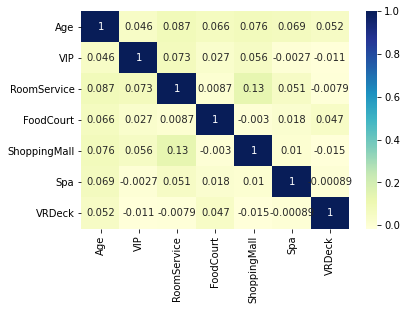

In [390]:

corrMatrix = copp.iloc[:,1:8].corr()
dataplot = sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)